In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
dataset_path = r"R:\sandhiya\25-737\asl_dataset"

In [5]:
img_height, img_width = 64, 64  # Resize all images to 64x64
batch_size = 16
epochs = 25
num_classes = 36  # 0-9 + a-z = 36 classes

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 80% train, 20% validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [7]:
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


C:\Users\DLK Groups\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint("asl_cnn_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint, earlystop]
)


Epoch 1/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.0530 - loss: 3.5279 
Epoch 1: val_accuracy improved from None to 0.23459, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 47s 347ms/step - accuracy: 0.0954 - loss: 3.3421 - val_accuracy: 0.2346 - val_loss: 2.5121
Epoch 2/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.2404 - loss: 2.5353 
Epoch 2: val_accuracy improved from 0.23459 to 0.47316, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.2714 - loss: 2.3577 - val_accuracy: 0.4732 - val_loss: 1.6509
Epoch 3/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.3953 - loss: 1.9099 
Epoch 3: val_accuracy improved from 0.47316 to 0.54473, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 144ms/step - accuracy: 0.4081 - loss: 1.8331 - val_accuracy: 0.5447 - val_loss: 1.3590
Epoch 4/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4583 - loss: 1.6542 
Epoch 4: val_accuracy improved from 0.54473 to 0.61829, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.4751 - loss: 1.5734 - val_accuracy: 0.6183 - val_loss: 1.1178
Epoch 5/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5360 - loss: 1.3863 
Epoch 5: val_accuracy improved from 0.61829 to 0.63221, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - accuracy: 0.5338 - loss: 1.3726 - val_accuracy: 0.6322 - val_loss: 1.1032
Epoch 6/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5494 - loss: 1.2272 
Epoch 6: val_accuracy improved from 0.63221 to 0.68588, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 165ms/step - accuracy: 0.5686 - loss: 1.2047 - val_accuracy: 0.6859 - val_loss: 0.8834
Epoch 7/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6012 - loss: 1.1090 
Epoch 7: val_accuracy improved from 0.68588 to 0.71173, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.5984 - loss: 1.1313 - val_accuracy: 0.7117 - val_loss: 0.8458
Epoch 8/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6399 - loss: 1.0319 
Epoch 8: val_accuracy improved from 0.71173 to 0.75149, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 147ms/step - accuracy: 0.6332 - loss: 1.0415 - val_accuracy: 0.7515 - val_loss: 0.7433
Epoch 9/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6424 - loss: 1.0174 
Epoch 9: val_accuracy did not improve from 0.75149
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.6506 - loss: 0.9970 - val_accuracy: 0.7455 - val_loss: 0.6978
Epoch 10/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6684 - loss: 0.9412 
Epoch 10: val_accuracy improved from 0.75149 to 0.78131, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.6750 - loss: 0.9102 - val_accuracy: 0.7813 - val_loss: 0.6156
Epoch 11/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7123 - loss: 0.7852 
Epoch 11: val_accuracy did not improve from 0.78131
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 140ms/step - accuracy: 0.7102 - loss: 0.8007 - val_accuracy: 0.7336 - val_loss: 0.6859
Epoch 12/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7109 - loss: 0.7987 
Epoch 12: val_accuracy improved from 0.78131 to 0.80119, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.6953 - loss: 0.8162 - val_accuracy: 0.8012 - val_loss: 0.5110
Epoch 13/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7064 - loss: 0.7914 
Epoch 13: val_accuracy improved from 0.80119 to 0.81909, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.7152 - loss: 0.7764 - val_accuracy: 0.8191 - val_loss: 0.5084
Epoch 14/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7564 - loss: 0.6585 
Epoch 14: val_accuracy improved from 0.81909 to 0.82704, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.7455 - loss: 0.6962 - val_accuracy: 0.8270 - val_loss: 0.4690
Epoch 15/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7616 - loss: 0.6538 
Epoch 15: val_accuracy did not improve from 0.82704
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - accuracy: 0.7599 - loss: 0.6550 - val_accuracy: 0.8250 - val_loss: 0.5065
Epoch 16/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.7579 - loss: 0.6634 
Epoch 16: val_accuracy improved from 0.82704 to 0.84493, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.7584 - loss: 0.6577 - val_accuracy: 0.8449 - val_loss: 0.4565
Epoch 17/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7723 - loss: 0.6091 
Epoch 17: val_accuracy did not improve from 0.84493
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 160ms/step - accuracy: 0.7724 - loss: 0.5966 - val_accuracy: 0.8429 - val_loss: 0.4417
Epoch 18/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7878 - loss: 0.5679 
Epoch 18: val_accuracy did not improve from 0.84493
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.7793 - loss: 0.5953 - val_accuracy: 0.8211 - val_loss: 0.4753
Epoch 19/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.7704 - loss: 0.5976 
Epoch 19: val_accuracy improved from 0.84493 to 0.84692, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 120ms/step - accuracy: 0.7922 - loss: 0.5447 - val_accuracy: 0.8469 - val_loss: 0.4100
Epoch 20/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8003 - loss: 0.5275 
Epoch 20: val_accuracy did not improve from 0.84692
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.7982 - loss: 0.5334 - val_accuracy: 0.8410 - val_loss: 0.3931
Epoch 21/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8018 - loss: 0.5371 
Epoch 21: val_accuracy did not improve from 0.84692
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.8141 - loss: 0.5222 - val_accuracy: 0.8211 - val_loss: 0.4608
Epoch 22/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7737 - loss: 0.5357 
Epoch 22: val_accuracy improved from 0.84692 to 0.86481, saving model to asl_cnn_model.h5


126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.7952 - loss: 0.5194 - val_accuracy: 0.8648 - val_loss: 0.3576
Epoch 23/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.8269 - loss: 0.4653 
Epoch 23: val_accuracy did not improve from 0.86481
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.8086 - loss: 0.4940 - val_accuracy: 0.8588 - val_loss: 0.3750
Epoch 24/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8266 - loss: 0.5137 
Epoch 24: val_accuracy did not improve from 0.86481
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 159ms/step - accuracy: 0.8156 - loss: 0.5223 - val_accuracy: 0.8290 - val_loss: 0.4270
Epoch 25/25
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8280 - loss: 0.4758
Epoch 25: val_accuracy did not improve from 0.86481
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.8390 - loss: 0.4499 - val_accuracy: 0.8350 - val_loss: 0.4133


Text(0.5, 1.0, 'Accuracy')

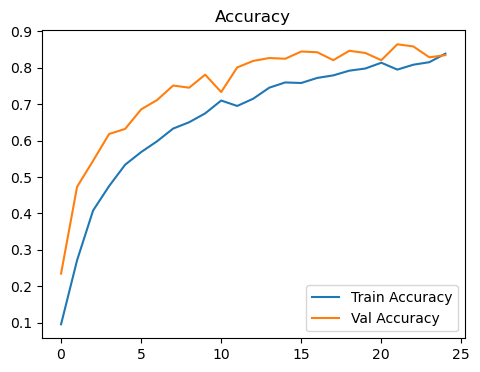

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')


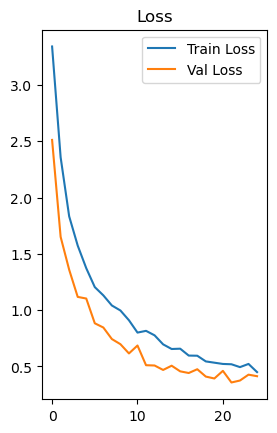

In [13]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [14]:
model.save("asl_cnn_final_model.h5")
print("Model training complete and saved as 'asl_cnn_final_model.h5'")

Model training complete and saved as 'asl_cnn_final_model.h5'


In [18]:
# Import Libraries
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the trained model
model_path = r"R:\sandhiya\25-737\asl_cnn_final_model.h5"
model = load_model(model_path)
print("Model loaded successfully.")

# Class labels (0-9 + a-z)
classes = [str(i) for i in range(10)] + [chr(i) for i in range(ord('a'), ord('z')+1)]

# Function to predict ASL image
def predict_asl(img_path):
    # Load image
    img = image.load_img(img_path, target_size=(64,64))  # resize to match training
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # normalize
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Prediction
    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    confidence = predictions[0][class_index]

    return classes[class_index], confidence

# Test the prediction
test_image_path = r"R:\sandhiya\25-737\asl_dataset\2\hand3_2_dif_seg_5_cropped.jpeg" # change to your test image
predicted_class, confidence = predict_asl(test_image_path)
print(f"Predicted ASL Sign: {predicted_class} with confidence {confidence:.2f}")


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted ASL Sign: 2 with confidence 0.57
